## Plot all FT's

In [1]:
from pathlib import Path
from skimage import io
import numpy as np
import napari
from os.path import exists
from brainlit.utils.session import NeuroglancerSession
from cloudvolume.exceptions import SkeletonDecodeError
from napari_animation import AnimationWidget
from cloudvolume import CloudVolume
from brainlit.utils import NeuronTrace
from pynufft import NUFFT

dir = "precomputed://s3://open-neurodata/brainlit/brain1"
dir_segments = "precomputed://s3://open-neurodata/brainlit/brain1_segments"
mip = 0
vol =CloudVolume(dir_segments, mip=mip)

num_goal = 0
num = -1
skel_id = -1

while num < num_goal:
    skel_id += 1
    try:
        skel = vol.skeleton.get(skel_id)
        print(f"Skeleton # {skel_id} exists")
        num += 1
    except SkeletonDecodeError:
        print(f"#{skel_id} invalid")

neuron = NeuronTrace(dir_segments, seg_id=skel_id, mip=mip, rounding=False)

paths = neuron.get_paths() #coordinates are in nm

/Users/thomasathey/Documents/mimlab/mouselight/docs_env/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


#0 invalid
#1 invalid
Skeleton # 2 exists


In [2]:
NufftObj = NUFFT()

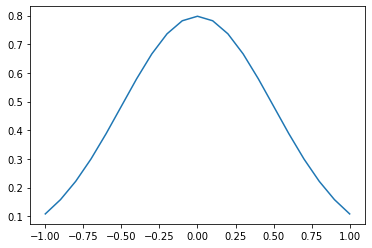

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [12]:
from scipy.stats import norm
import matplotlib.pyplot as plt

times = np.arange(-1, 1.1, 0.1)
signal = norm.pdf(times, scale=0.5)

plt.plot(times, signal)
plt.show()

Nd = (10,)
Kd = (20,)
Jd = (6,)

NufftObj.plan(times, Nd, Kd, Jd)


# nufft_freq_data =NufftObj.adjoint(time_data)
# pyplot.plot(om,nufft_freq_data.real,'.', label='real')
# pyplot.plot(om,nufft_freq_data.imag,'r.', label='imag')
# pyplot.legend()
# pyplot.show()

In [14]:
NufftObj = NUFFT()

import numpy
om = numpy.random.randn(1512,1)
# om is an M x 1 ndarray: locations of M points. *om* is normalized between [-pi, pi]
# Here M = 1512

Nd = (256,)
Kd = (512,)
Jd = (6,)

NufftObj.plan(om, Nd, Kd, Jd)

nufft_freq_data =NufftObj.adjoint(time_data)

ValueError: dimension mismatch